In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from tqdm import tqdm

In [97]:
class GPG_model:

    def __init__(self, ):
        self.gender_ratio = 0.5
        self.gender_profession_probs = np.array([[0.2, 0.6, 0.2],
                                                 [0.4, 0.5, 0.1]])
        self.profession_means = np.array([3.e5, 7.5e5, 1.e6])
        self.gender_dist = stats.bernoulli(p=self.gender_ratio)
        self.raw_job_imbalance_factor = -.1
        self.payment_variance = 1.e5
        
    def raw_gender_imbalance(self, gender):
        return 1 - self.raw_job_imbalance_factor * gender


    def sample(self):
        gender = stats.bernoulli.rvs(p=self.gender_ratio)
        profession = np.random.choice(3, p=self.gender_profession_probs[gender,:])
        salary = stats.norm.rvs(loc=self.profession_means[profession]*self.raw_gender_imbalance(gender),
                                scale=self.payment_variance)
        # salary = stats.lognorm.rvs(s=1.e0, loc=self.profession_means[profession]*self.raw_gender_imbalance(gender),
        #                            scale=self.payment_variance)
        return gender, profession, salary
    
    
    def sample_many(self, n):
        data = dict()
        data['gender'] = list()
        data['position'] = list()
        data['salary'] = list()
        
        for _ in tqdm(range(n)):
            g, p, s =self.sample()
            data['gender'].append(g)
            data['position'].append(p)
            data['salary'].append(s)
            
        return pd.DataFrame(data)
        
        

In [98]:
m = GPG_model()
df = m.sample_many(100000)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:14<00:00, 7107.13it/s]


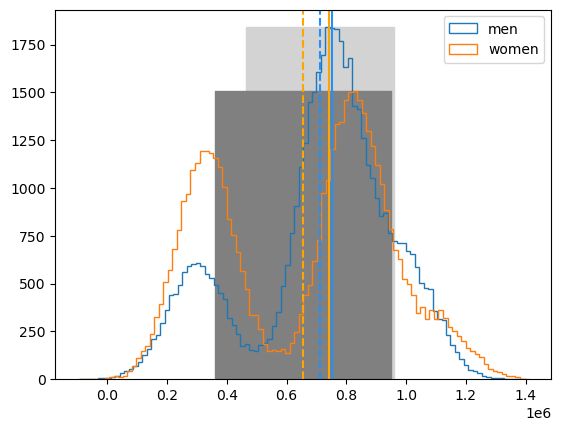

Raw gender gap: 8.576% in favour of men.
Median women: 740777.9947350727
Median men: 751045.8355541639
Median difference: 1.386% in favour of men


In [99]:
"""
3.1 & 3.2:

I'm plotting the gender means as dotted lines, the std as a filled section (light gray for men and grey for women) and
the gender medians in the already existing histogram plot: I am taking inspiration from the coding/notation already provided, 
to do my further plot coding :)

For kicks, I made the calculation of the mean and median generic, so that if one changes the self.raw_job_imbalance_factor, 
the gender label also changes with it. Probably unnecessary, but I have fun with those kinds of things.."""

mask_men = df['gender']==0
mask_women = df['gender']==1

mean_women = df['salary'][mask_women].mean()
mean_men = df['salary'][mask_men].mean()

std_women = df['salary'][mask_women].std()
std_men = df['salary'][mask_men].std()

median_women = df['salary'][mask_women].median()
median_men = df['salary'][mask_men].median()

plt.figure()
plt.hist(df['salary'][mask_men], bins=100, histtype='step', label='men')
plt.hist(df['salary'][mask_women], bins=100, histtype='step', label='women')

plt.axvline(mean_men, linestyle='--', color='dodgerblue')
plt.axvline(mean_women, linestyle='--', color='orange')

plt.axvline(median_men, linestyle='-', color='dodgerblue')
plt.axvline(median_women, linestyle='-', color='orange')

y_max_men = max(np.histogram(df['salary'][mask_men], bins=100)[0])
y_max_women = max(np.histogram(df['salary'][mask_women], bins=100)[0])
plt.fill_betweenx([0, y_max_men], mean_men - std_men, mean_men + std_men, color='lightgray')
plt.fill_betweenx([0, y_max_women], mean_women - std_women, mean_women + std_women, color='grey')

plt.legend()
plt.show()

min_mean = min((mean_women, mean_men))
max_mean = max((mean_women, mean_men))

if max_mean == mean_men:
    mean_favour = 'men'
else:
    mean_favour = 'women'
    
print(f"Raw gender gap: {((max_mean - min_mean) * 100) / min_mean:.3f}% in favour of {mean_favour}.")

min_median = min((median_women, median_men))
max_median = max((median_women, median_men))

if max_median == median_men:
    median_favour = 'men'
else:
    median_favour = 'women'

print(f'Median women: {median_women}\nMedian men: {median_men}\nMedian difference: {(max_median - min_median) * 100 / min_median:.3f}% in favour of {median_favour}')

__Mean and median__:

There is a much larger difference between the mean values than the median values of the two gender's salaries. This tells us that the middle salary for men and women is the same, whereas the distribution of salaries varies between the two genders.

In [18]:
df['salary'][mask_men].mean()

717263.3379888093

In [19]:
df['salary'][mask_women].mean()

651100.8893325217

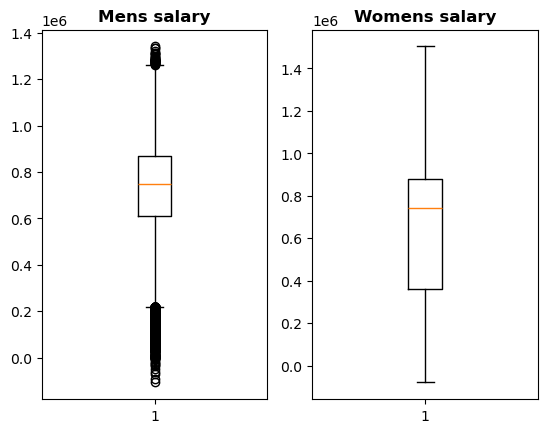

In [86]:
# 3.2 box plots:

fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['salary'][mask_men].values)
ax[0].set_title('Mens salary', fontweight='bold')
ax[1].boxplot(df['salary'][mask_women].values)
ax[1].set_title('Womens salary', fontweight='bold')
plt.show()

__Box plots__:

The box plots show that the distribution of men's and women's salary is quite different; the men's box plot indicates a large amount of
'outliers' whereas not a single one can be seen in the women's plot. The mean sits in the middle of the interquartile range, which is rather compact. The women's IQR, however, is wide and the mean is located in the very upper range of this. This tells us that 68% of men make roughly between 600k and 900k, whereas the corresponding share of women make bewteen appx. 400k and 900k, which is significantly more spread out.

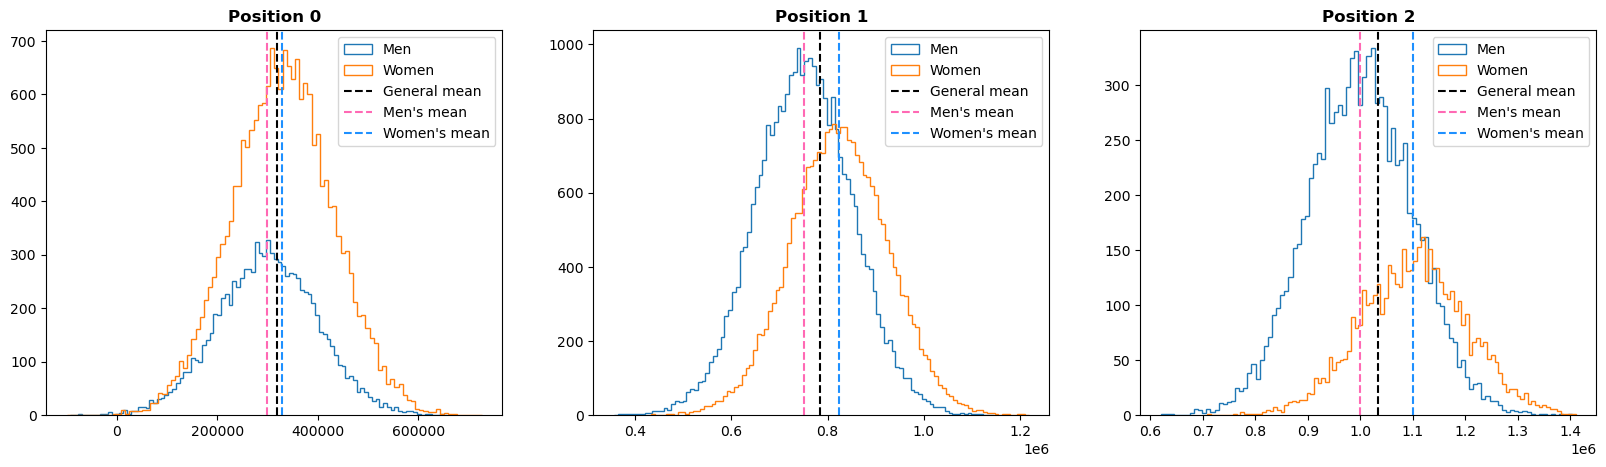

In [103]:
# 3.3 & 3.4 - I made them all in the same plots from the beginning, so that all necessary info would be provided already :)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for pos in range(3):
    mask_pos = df['position'] == pos
    mean = df['salary'][mask_pos].mean()
    men = df['salary'][mask_pos][mask_men]
    women = df['salary'][mask_pos][mask_women]

    ax[pos].hist(men, bins=100, histtype='step', label='men')
    ax[pos].hist(women, bins=100, histtype='step', label='women')
    ax[pos].axvline(mean, linestyle='--', color='black')
    ax[pos].axvline(men.mean(), color='hotpink', linestyle='--')
    ax[pos].axvline(women.mean(), color='dodgerblue', linestyle='--')
    ax[pos].set_title(f'Position {pos}', fontweight='bold')
    ax[pos].legend(["Men", "Women", "General mean", "Men's mean", "Women's mean"])

__3.5: Simpsons paradox?__

The fact that women make more than men on average _within_ the different positions, whereas men make more than women on average _in general_, reminds me of the Simpson's paradox, which occurs due to large inequalities in data amounts. As shown in the histograms above, the ratio female and male workers is very skew in two out of three positions; for example, the highest paid position (2) shows a share of female employees which mean salary lies much higher than the men's - but the share of female employees in this position is about as little as 1/3 (50% of the share of male employees). The opposite picture is given by the lowest paid position (0); here are twice as many female employees as male, and the mean salary for this position is about a third of the mean salary for position 2!

The result of this is that the general average of female salary is lower - although it rather reflects the dominance of women in the lowest paid position and underweight of which in the highest paid position (both in which they, incidentally, make more their male coworkers on average), as opposed to their salary being universally lower regardless of position. Interesting stuff!

__3.7: Comments__

Unfortunately, I didn't get to do the last bit with the arguments - I'm already overdue. But, I'd say it seems as if the only solution to fill the pay gap were to increase the share of male employees in lower paid positions and increase the share of women in higher paid positions. Am I completely off here? It would be great to discuss the different aspects and arguments in class!